In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hydrophone_data_processing import useful_variables

hydrophone_pairs = useful_variables.get_hydrophone_pairs()

def get_data(df, h1, h2, column):
    return df[(df.h1_index==h1) & (df.h2_index==h2)][column]

In [2]:
df_01 = pd.read_csv('/media/sda/data/robdata/tremors/xcorr/cc_0.1.csv')

In [3]:
df_05 = pd.read_csv('/media/sda/data/robdata/tremors/xcorr/cc_0.5.csv')

In [4]:
start = df_01.window_starttime.min()
end = df_01.window_endtime.max()
times = pd.date_range(start=start, end=end, freq='60s')

In [5]:
df_01.loc[df_01.cc_normed_max<=0.85, 'lagtime_seconds'] = np.nan
df_05.loc[df_05.cc_normed_max<=0.85, 'lagtime_seconds'] = np.nan

df_01.loc[df_01.cross_correlation_max<=10., 'lagtime_seconds'] = np.nan
df_05.loc[df_05.cross_correlation_max<=10., 'lagtime_seconds'] = np.nan

In [6]:
df_01.cross_correlation_max.describe()

count     21600.000000
mean        491.519428
std        3341.927280
min          -0.000234
25%           0.054090
50%           1.660747
75%          56.370005
max      122329.790289
Name: cross_correlation_max, dtype: float64

<AxesSubplot:>

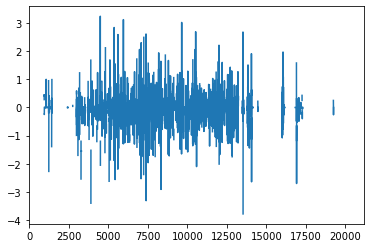

In [7]:
df_01.lagtime_seconds.plot()

In [8]:
# df_01.plot.scatter(x='lagtime_seconds', y='cross_correlation_max')

<AxesSubplot:xlabel='cc_normed_max', ylabel='cross_correlation_max'>

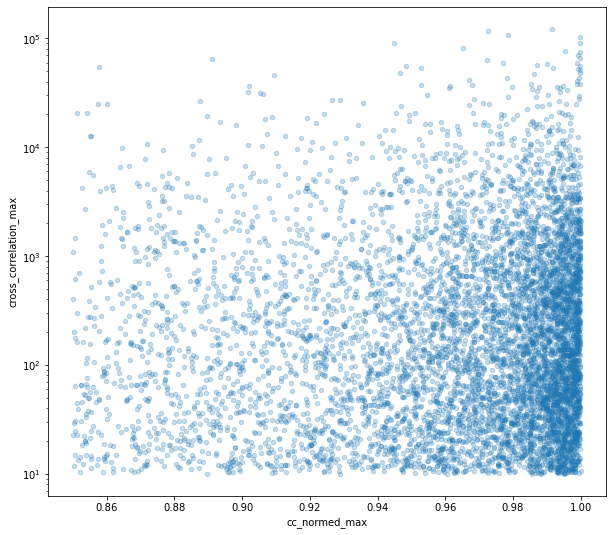

In [9]:
fig, ax = plt.subplots(figsize=(10, 9))
df_01.dropna().plot.scatter(x='cc_normed_max', y='cross_correlation_max', logy=True, alpha=0.25, ax=ax)

<AxesSubplot:>

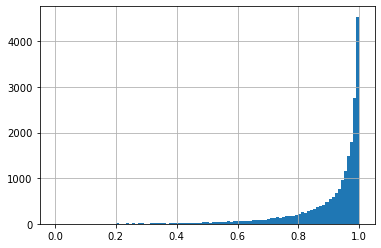

In [10]:
df_01.cc_normed_max.hist(bins=np.linspace(0, 1, 100))

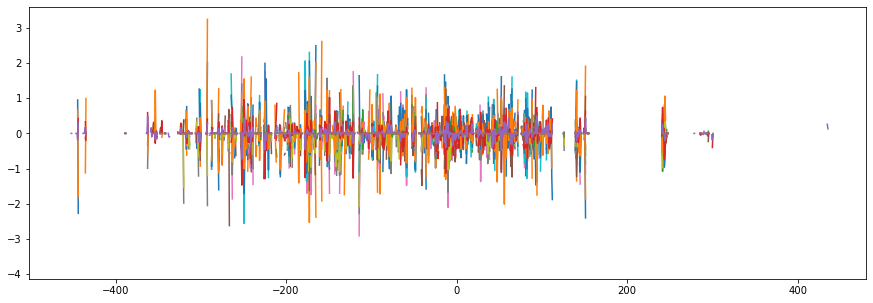

In [11]:
fig, ax = plt.subplots(figsize=(15, 5))


for pair in hydrophone_pairs:
    h1, h2 = pair
    # data = df_01[(df_01.h1_index==h1) & (df_01.h2_index==h2)].lagtime_seconds
    data = get_data(df_01, h1, h2, 'lagtime_seconds')
    x = np.linspace(-500, 500, data.shape[0])
    ax.plot(x, data)

In [25]:
window_size = '30min'

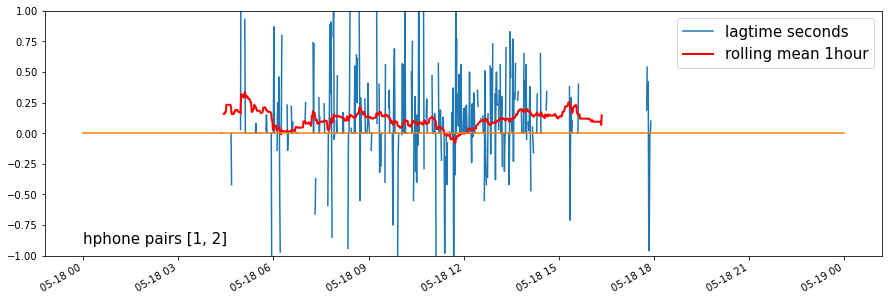

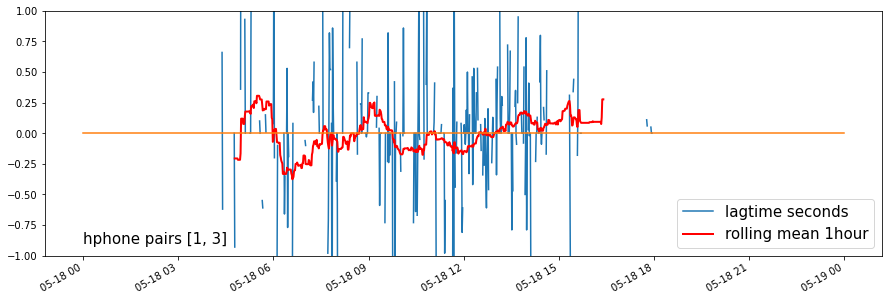

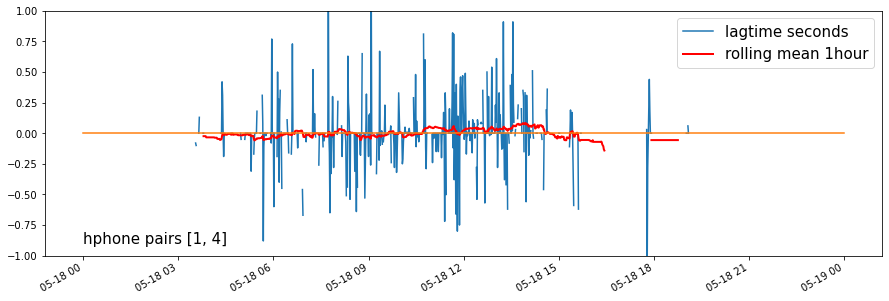

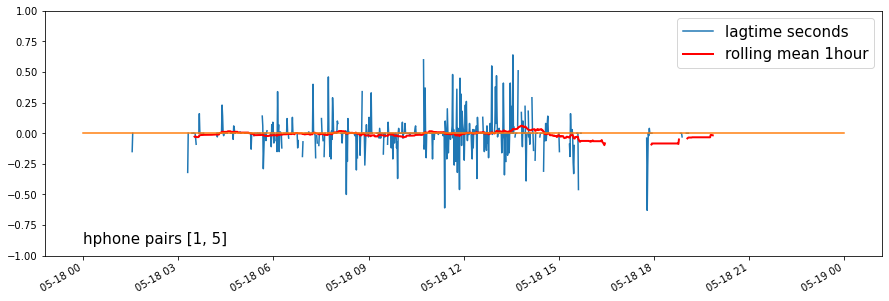

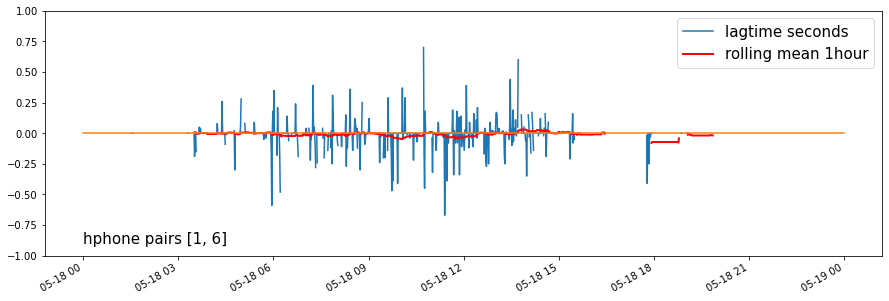

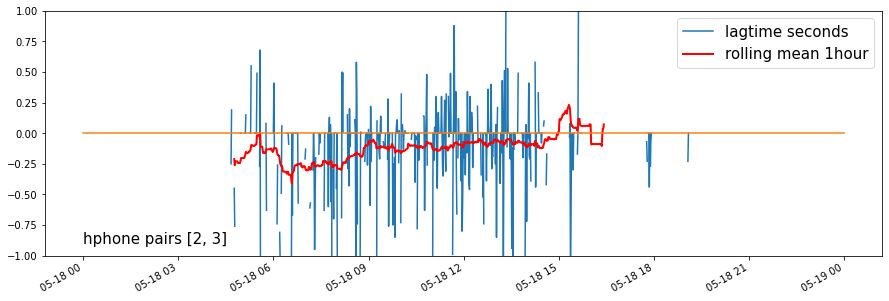

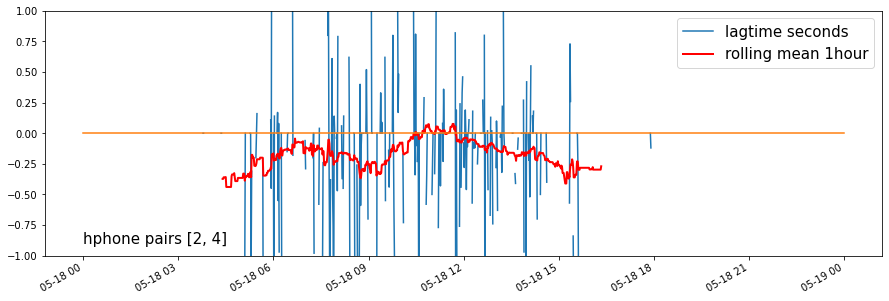

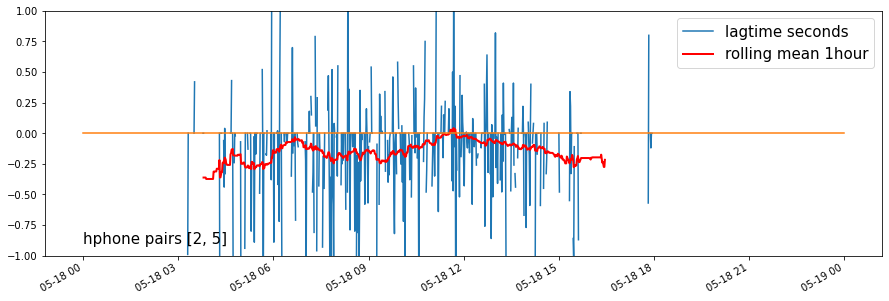

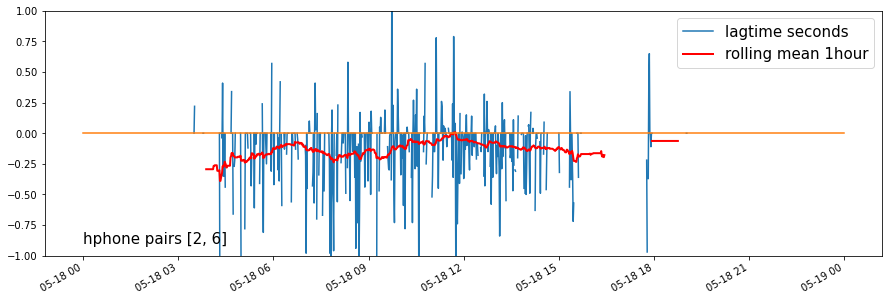

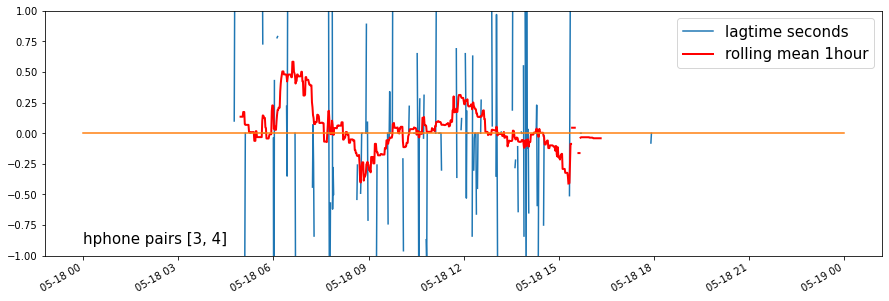

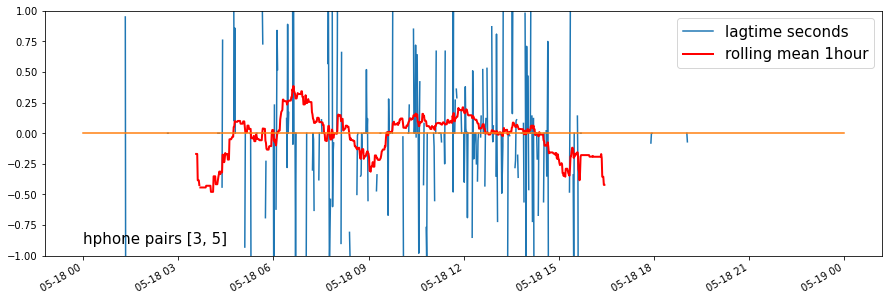

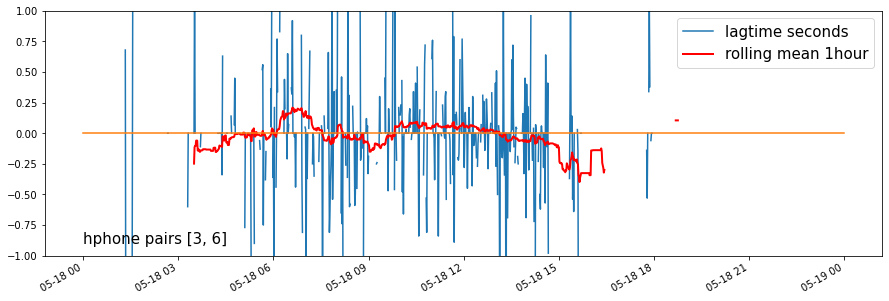

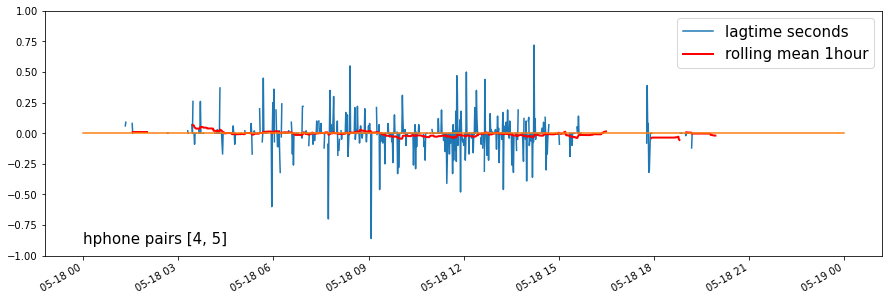

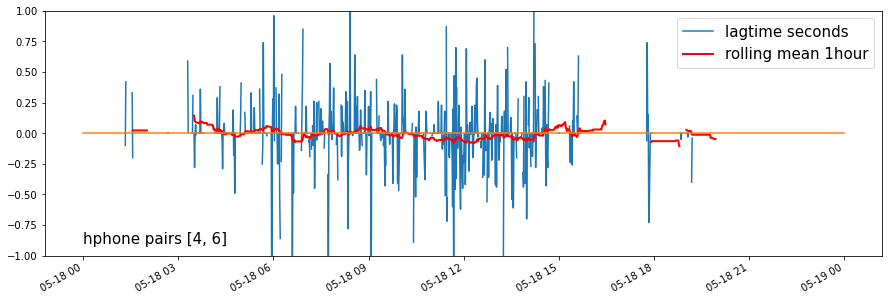

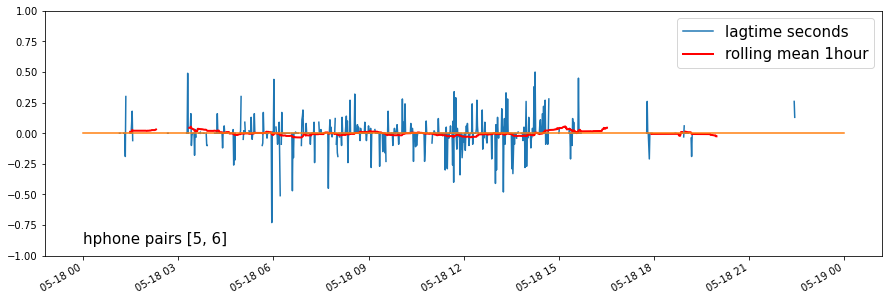

In [36]:
rolling_means_01 = pd.DataFrame()

for pair in hydrophone_pairs:
    fig, ax = plt.subplots(figsize=(15, 5))

    h1, h2 = pair
    data = get_data(df_01, h1, h2, 'lagtime_seconds')
    # times = pd.to_datetime(get_data(df_01, h1, h2, 'window_starttime'))
    ax.plot(times, data)
    # df = pd.DataFrame(data.values, index=times).rolling(window='1h').mean()
    df = pd.DataFrame(data.values, index=times).rolling(window='60min', min_periods=10).mean()
    df.plot(ax=ax, color='red', linewidth=2, label='rolling mean 1hour')
    ax.text(s='hphone pairs {}'.format([p+1 for p in pair]), x=times.min(), y=-0.9, fontsize=15)
    
    
    ax.plot([times.min(), times.max()], [0, 0])
    ax.set_ylim(-1, 1)
    ax.legend(['lagtime seconds', 'rolling mean 1hour'], fontsize=15)
    rolling_means_01.index = times
    rolling_means_01['h{f1},h{f2}'.format(f1=h1, f2=h2)] = df.values

In [13]:
data

14      NaN
29      NaN
44      NaN
59      NaN
74      NaN
         ..
21539   NaN
21554   NaN
21569   NaN
21584   NaN
21599   NaN
Name: lagtime_seconds, Length: 1440, dtype: float64

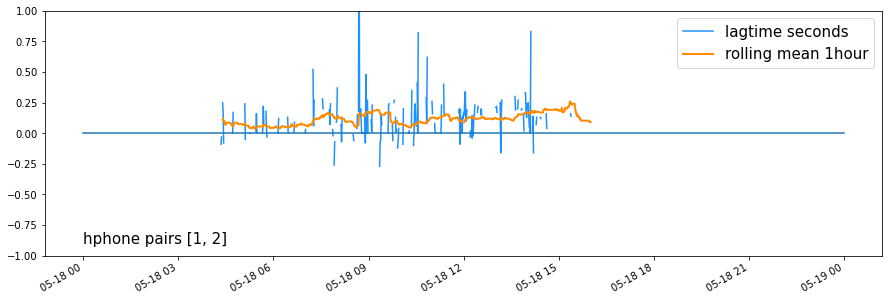

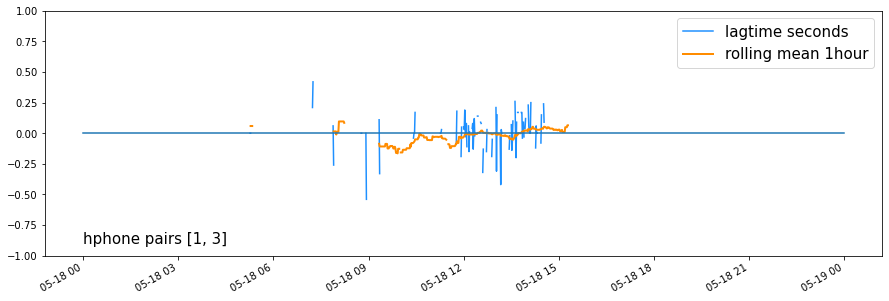

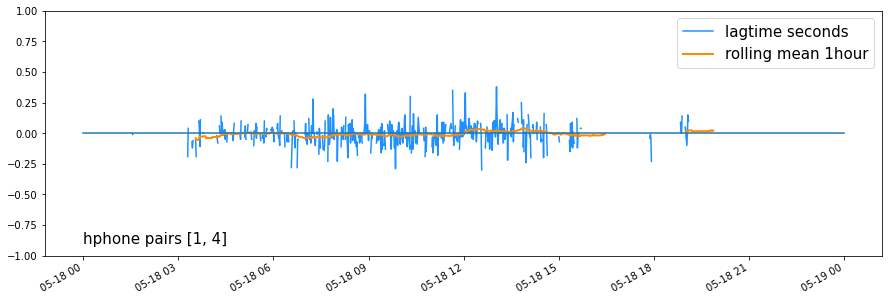

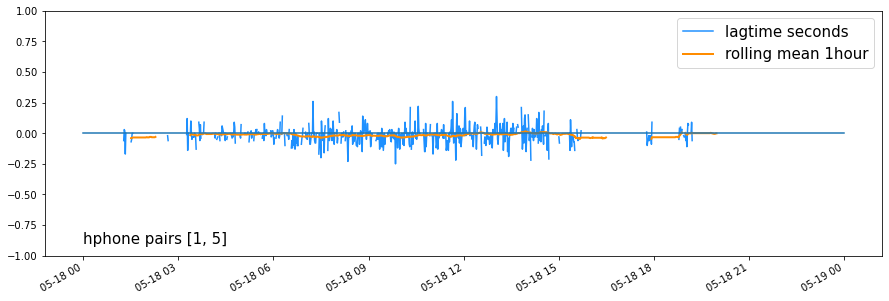

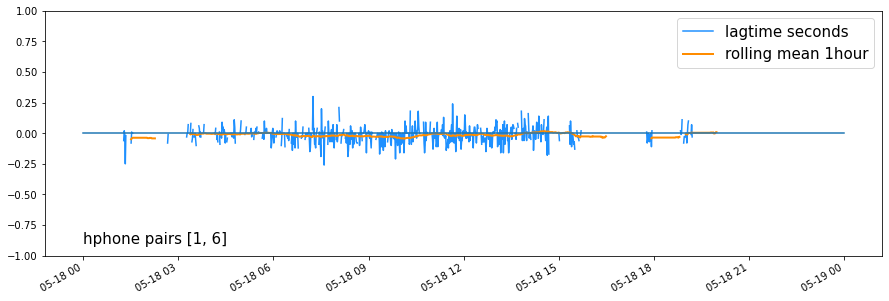

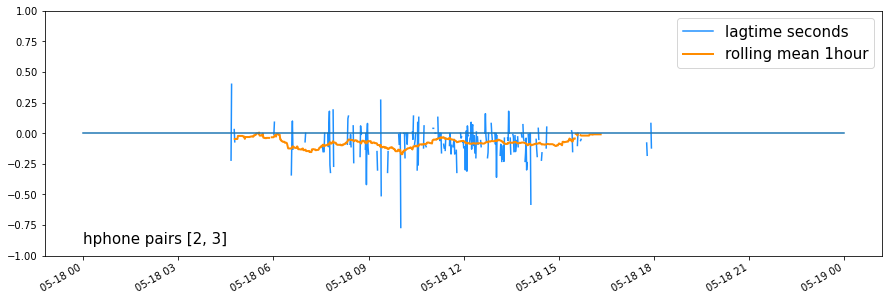

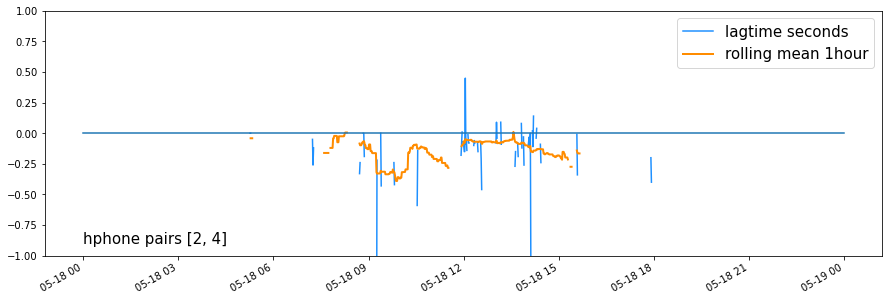

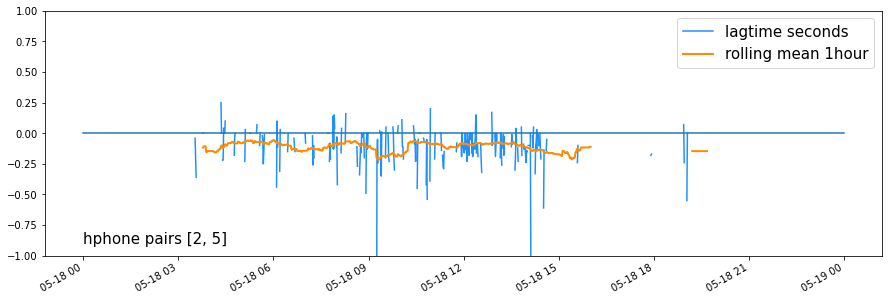

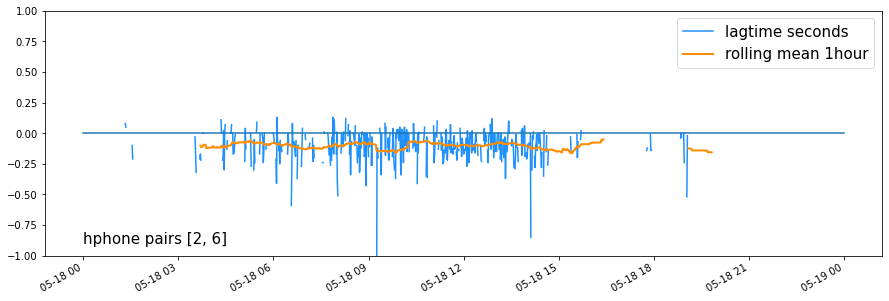

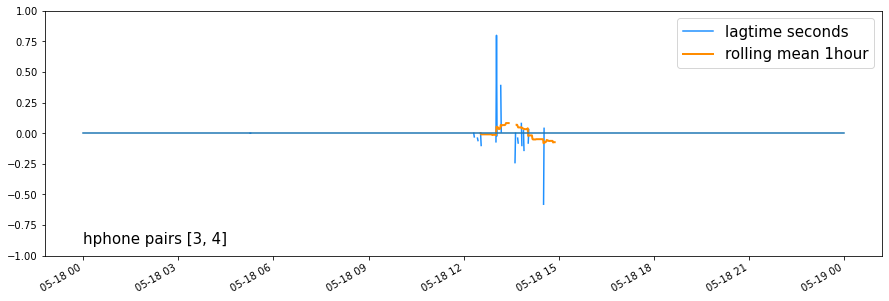

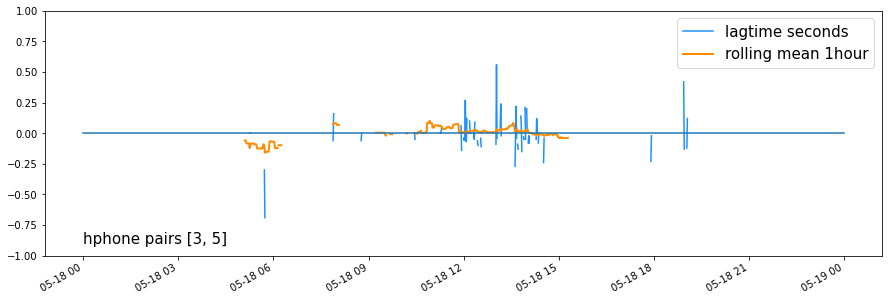

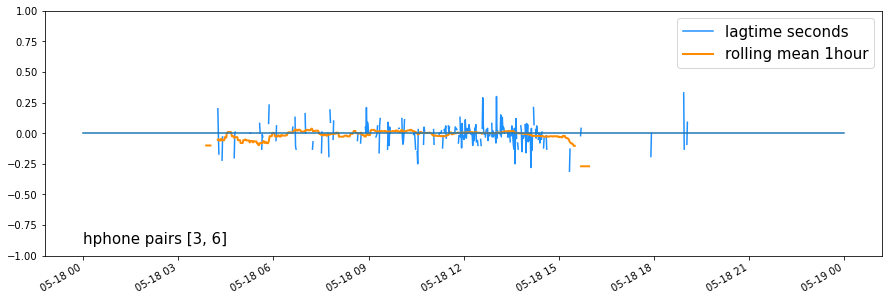

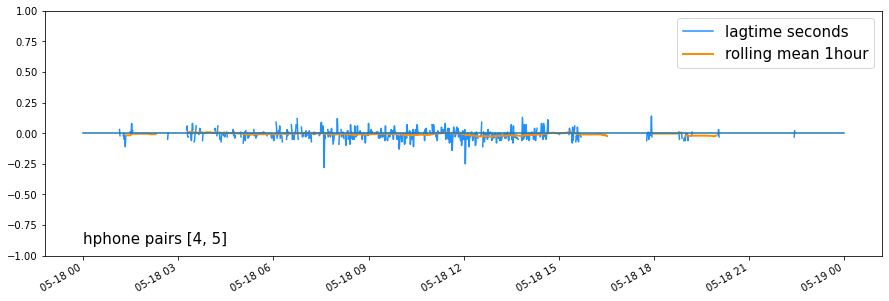

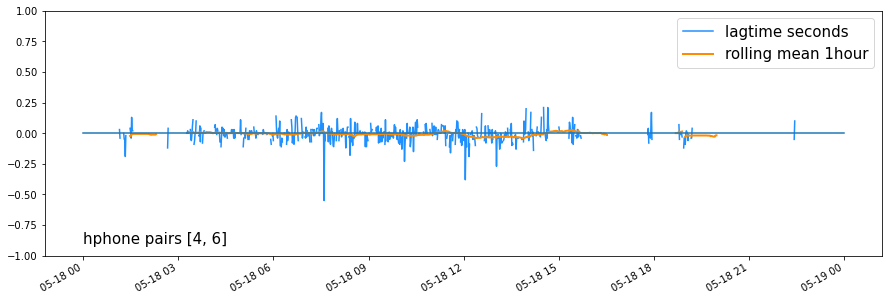

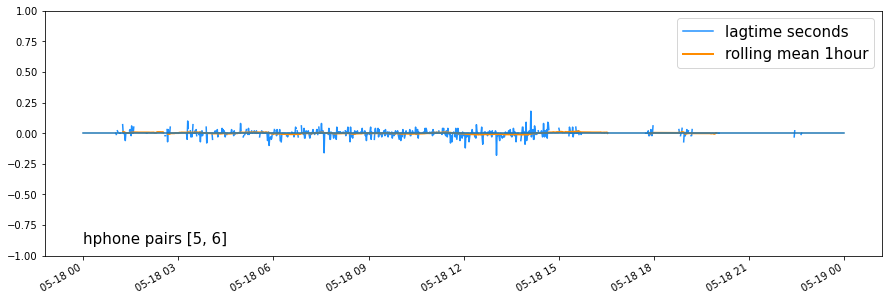

In [37]:
rolling_means_05 = pd.DataFrame()

for pair in hydrophone_pairs:
    fig, ax = plt.subplots(figsize=(15, 5))

    h1, h2 = pair
    data = get_data(df_05, h1, h2, 'lagtime_seconds')
    # times = pd.to_datetime(get_data(df_05, h1, h2, 'window_starttime'))
    
    ax.plot(times, data, color='dodgerblue')
    
    # df = pd.DataFrame(data.values, index=times).rolling(window='1h').mean()
    df = pd.DataFrame(data.values, index=times).rolling(window='60min', min_periods=10).mean()
    df.plot(ax=ax, color='darkorange', linewidth=2, label='rolling mean 1hour')
    
    ax.text(s='hphone pairs {}'.format([p+1 for p in pair]), x=times.min(), y=-0.9, fontsize=15)
    
    
    ax.plot([times.min(), times.max()], [0, 0])
    ax.set_ylim(-1, 1)
    ax.legend(['lagtime seconds', 'rolling mean 1hour'], fontsize=15)
    rolling_means_05.index = times
    rolling_means_05['h{f1},h{f2}'.format(f1=h1, f2=h2)] = df.values

In [15]:
rolling_means_01

,"h0,h1","h0,h2","h0,h3","h0,h4","h0,h5","h1,h2","h1,h3","h1,h4","h1,h5","h2,h3","h2,h4","h2,h5","h3,h4","h3,h5","h4,h5"
2019-05-18 00:00:02.907000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-18 00:01:02.907000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-18 00:02:02.907000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-18 00:03:02.907000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-18 00:04:02.907000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-18 23:55:02.907000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-18 23:56:02.907000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-18 23:57:02.907000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-18 23:58:02.907000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


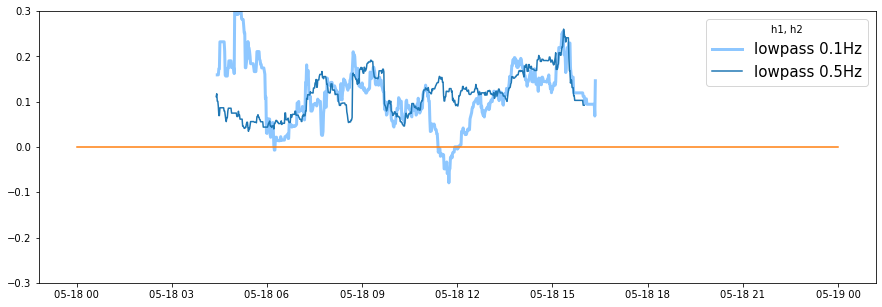

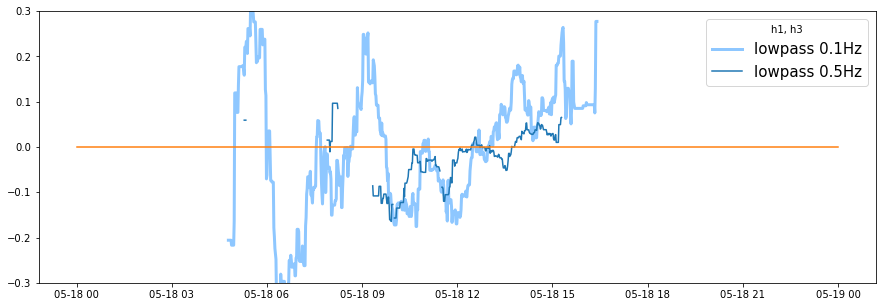

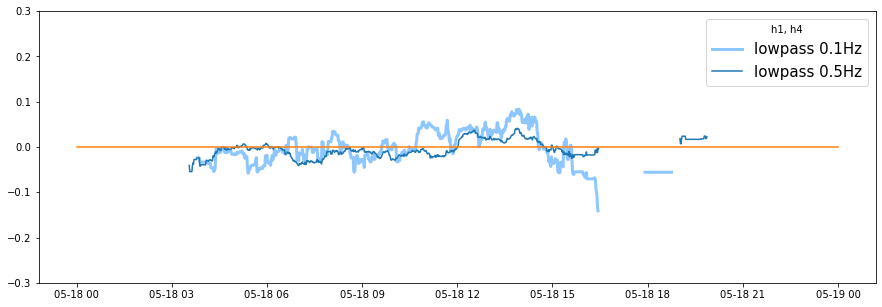

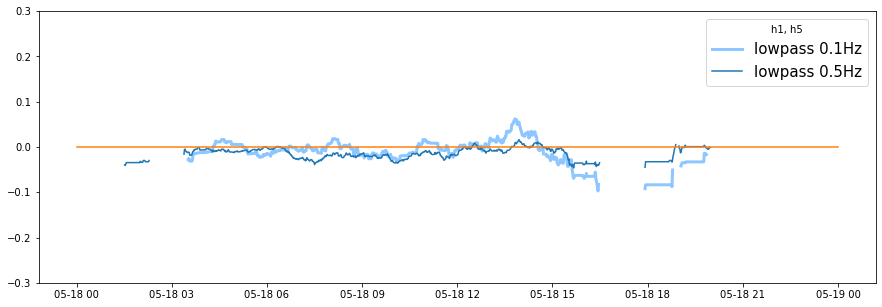

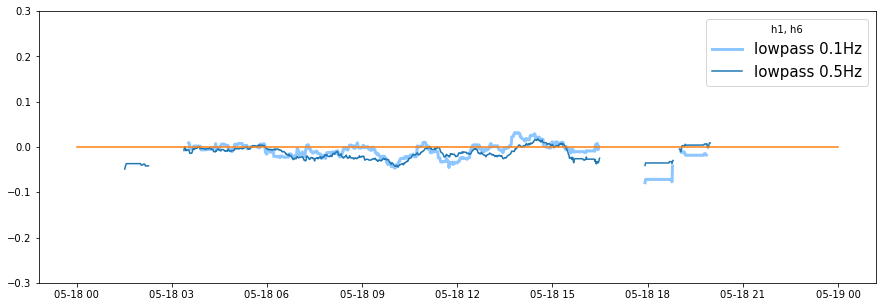

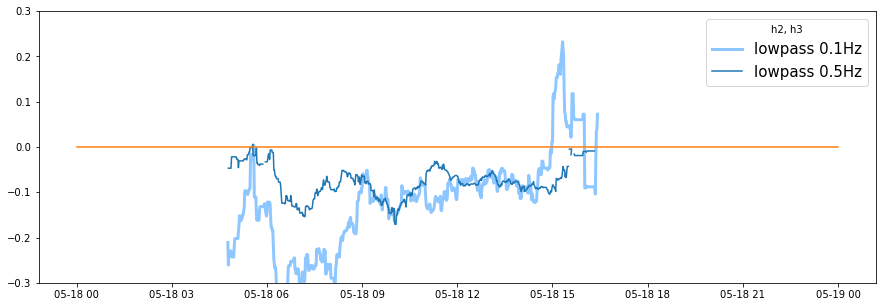

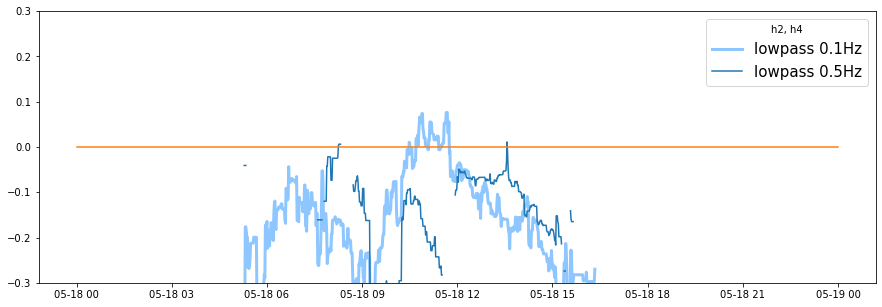

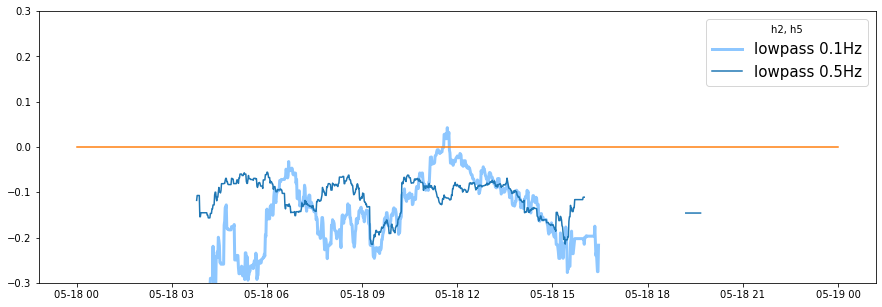

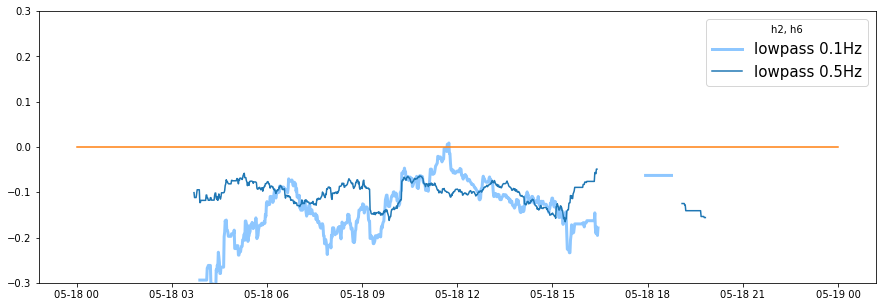

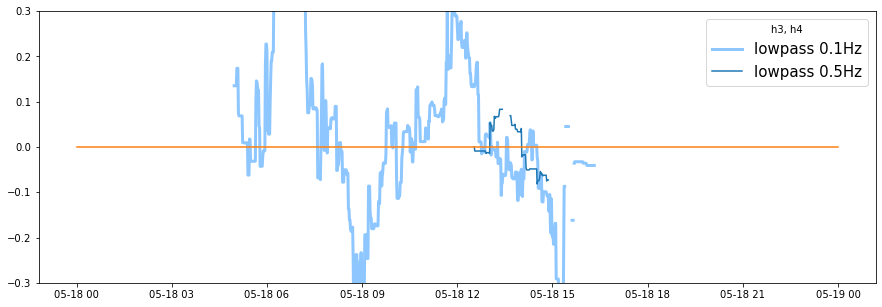

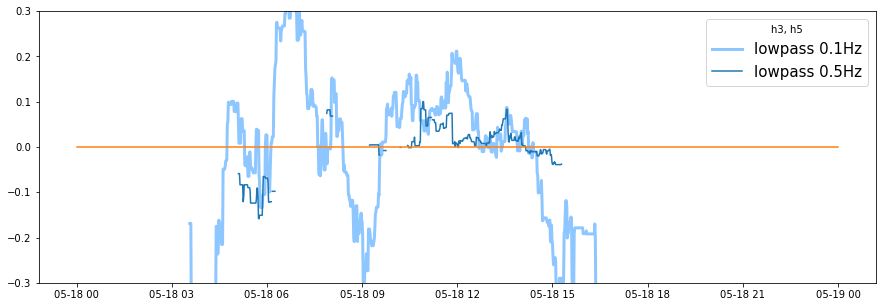

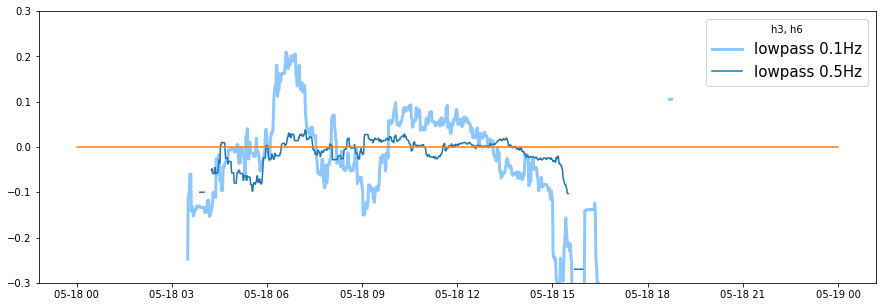

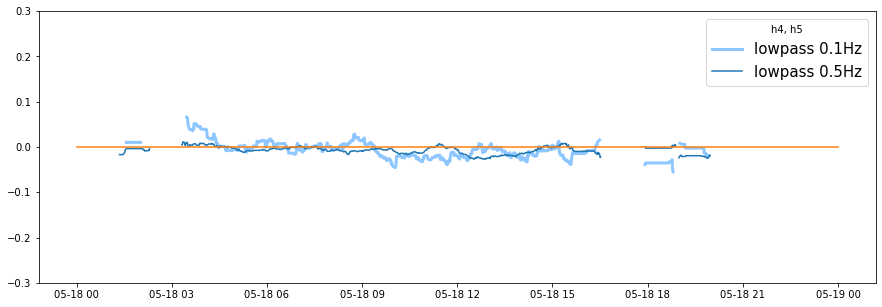

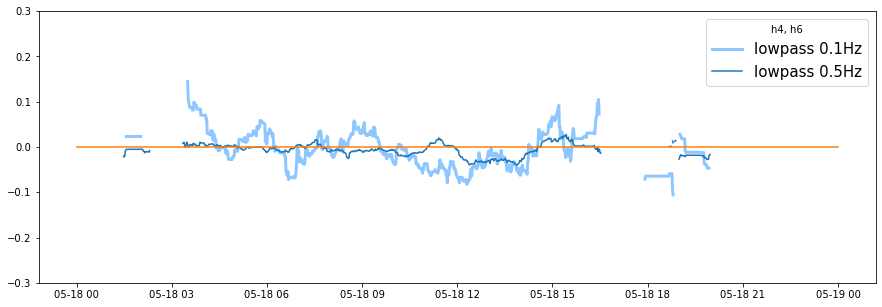

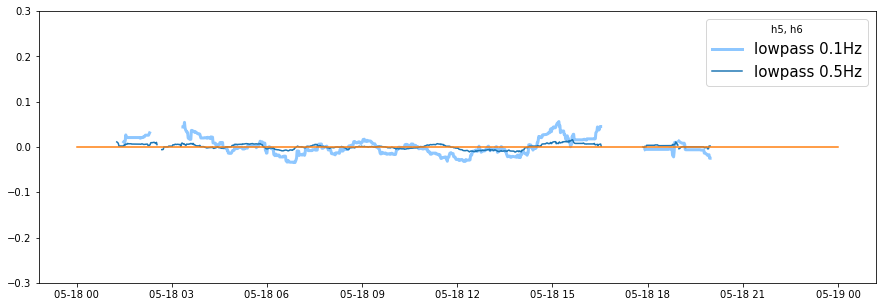

In [39]:
for pair in hydrophone_pairs:
    h1, h2 = pair
    fig, ax = plt.subplots(figsize=(15, 5))
    
    data_01 = rolling_means_01['h{h1},h{h2}'.format(h1=h1, h2=h2)]
    # x_01 = data_01.index
    # ax.plot(x_01, data_01, color='dodgerblue', alpha=0.5, linewidth=3
    ax.plot(times, data_01, color='dodgerblue', alpha=0.5, linewidth=3
           ,label='lowpass 0.1Hz')
    
    data_05 = rolling_means_05['h{h1},h{h2}'.format(h1=h1, h2=h2)]
    # x_05 = data_05.index
    # ax.plot(x_05, data_05, label='lowpass 0.5Hz')
    ax.plot(times, data_05, label='lowpass 0.5Hz')
    ax.plot([times.min(), times.max()], [0, 0])
    # ax.set_ylim(-0.25, 0.25)
    ax.legend(fontsize=15, title='h{h1}, h{h2}'.format(h1=h1+1,h2=h2+1))
    ax.set_ylim(-0.3, 0.3)
    

'2019-05-18T00:00:02.907000Z'

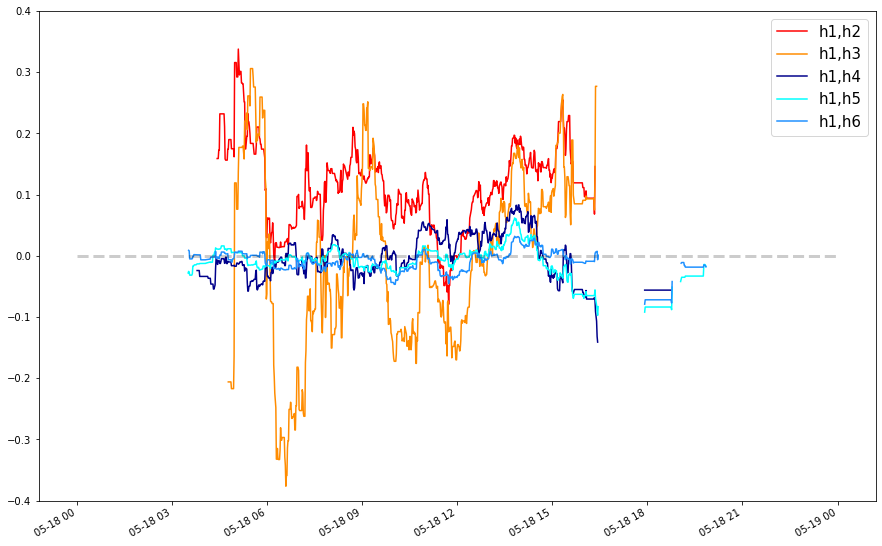

In [89]:
fig, ax = plt.subplots(figsize=(15, 10))

template = 'h{h1},h{h2}'

cols = [template.format(h1=h[0], h2=h[1]) for h in hydrophone_pairs[0:5]]
labels = [template.format(h1=h[0]+1, h2=h[1]+1) for h in hydrophone_pairs[0:5]]

# cols = ['h0,h1', 'h0,h2', 'h0,h3', 'h0,h4', 'h0,h5']
colors = ['red', 'darkorange' ,'darkblue', 'cyan', 'dodgerblue']

rolling_means_01[cols].plot(ax=ax, color=colors)
ax.legend(labels, fontsize=15)

ymin, ymax = (-0.4, 0.4)
ax.set_ylim(ymin, ymax)

start = pd.to_datetime(df_01.window_starttime.min())
end = pd.to_datetime(df_01.window_endtime.max())
ax.plot([start, end], [0, 0], color='black', linestyle='--', alpha=0.2, linewidth=3)

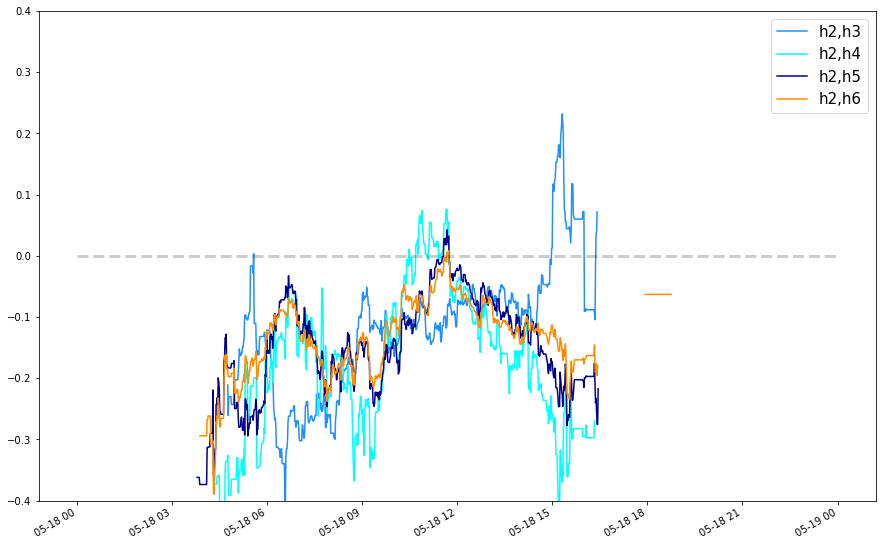

In [90]:
fig, ax = plt.subplots(figsize=(15, 10))

template = 'h{h1},h{h2}'

cols = [template.format(h1=h[0], h2=h[1]) for h in hydrophone_pairs[5:9]]
labels = [template.format(h1=h[0]+1, h2=h[1]+1) for h in hydrophone_pairs[5:9]]

# cols = ['h1,h2', 'h1,h3', 'h1,h4', 'h1,h5',]
colors = ['red', 'darkorange' ,'darkblue', 'cyan', 'dodgerblue']

rolling_means_01[cols].plot(ax=ax, color=colors[::-1])
ax.legend(labels, fontsize=15)
ax.set_ylim(ymin, ymax)

start = pd.to_datetime(df_01.window_starttime.min())
end = pd.to_datetime(df_01.window_endtime.max())
ax.plot([start, end], [0, 0], color='black', linestyle='--', alpha=0.2, linewidth=3)

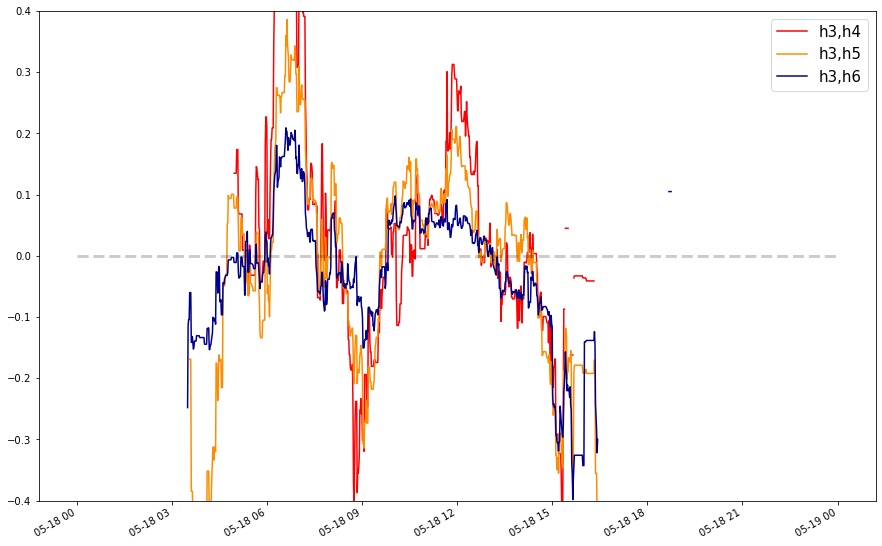

In [91]:
fig, ax = plt.subplots(figsize=(15, 10))


template = 'h{h1},h{h2}'

cols = [template.format(h1=h[0], h2=h[1]) for h in hydrophone_pairs[9:12]]
labels = [template.format(h1=h[0]+1, h2=h[1]+1) for h in hydrophone_pairs[9:12]]

# cols = ['h2,h3', 'h2,h4', 'h2,h5', ]
colors = ['red', 'darkorange' ,'darkblue', 'cyan', 'dodgerblue']

rolling_means_01[cols].plot(ax=ax, color=colors)
ax.legend(labels, fontsize=15)
ax.set_ylim(ymin, ymax)

start = pd.to_datetime(df_01.window_starttime.min())
end = pd.to_datetime(df_01.window_endtime.max())
ax.plot([start, end], [0, 0], color='black', linestyle='--', alpha=0.2, linewidth=3)

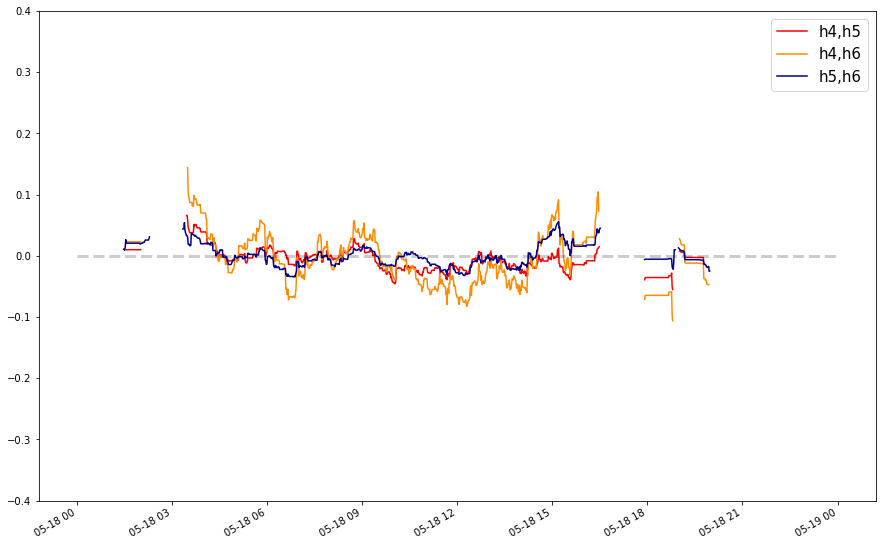

In [92]:
fig, ax = plt.subplots(figsize=(15, 10))

template = 'h{h1},h{h2}'

cols = [template.format(h1=h[0], h2=h[1]) for h in hydrophone_pairs[12:15]]
labels = [template.format(h1=h[0]+1, h2=h[1]+1) for h in hydrophone_pairs[12:15]]

# cols = ['h3,h4', 'h3,h5', ]
colors = ['red', 'darkorange' ,'darkblue', 'cyan', 'dodgerblue']

rolling_means_01[cols].plot(ax=ax, color=colors)
ax.legend(labels, fontsize=15)
ax.set_ylim(ymin, ymax)

start = pd.to_datetime(df_01.window_starttime.min())
end = pd.to_datetime(df_01.window_endtime.max())
ax.plot([start, end], [0, 0], color='black', linestyle='--', alpha=0.2, linewidth=3)

In [93]:
# # cross
# fig, ax = plt.subplots(figsize=(15, 10))

# cols = ['h4,h5', ]
# colors = ['red', 'darkorange' ,'darkblue', 'cyan', 'dodgerblue']

# rolling_means_01[cols].plot(ax=ax, color=colors)
# ax.legend(fontsize=15)
# ax.set_ylim(ymin, ymax)

# start = pd.to_datetime(df_01.window_starttime.min())
# end = pd.to_datetime(df_01.window_endtime.max())
# ax.plot([start, end], [0, 0], color='black', linestyle='--', alpha=0.2, linewidth=3)

In [22]:
# np.linspace(0, a.shape[0], a.shape[0])